# **1. Perkenalan Dataset**



1. **Sumber Dataset**:  
   Kaggle: https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales 

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
data = pd.read_csv("synthetic_beverage_sales_data.csv")
data.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print("Data Shape: ", data.shape)

Data Shape:  (8999910, 11)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [5]:
data["Order_Date"] = pd.to_datetime(data["Order_Date"])
print(data["Order_Date"].dtype)

datetime64[ns]


In [6]:
print("Total Missing Values: ", data.isnull().sum().sum())
print("Total Duplicates: ", data.duplicated().sum())

Total Missing Values:  0
Total Duplicates:  0


In [7]:
data.describe()

,Unit_Price,Quantity,Discount,Total_Price,Order_Date
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06,8999910
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02,2022-07-01 16:18:18.126182144
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01,2021-01-01 00:00:00
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00,2021-10-01 00:00:00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01,2022-07-02 00:00:00
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01,2023-04-01 00:00:00
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04,2023-12-30 00:00:00
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02,NaN


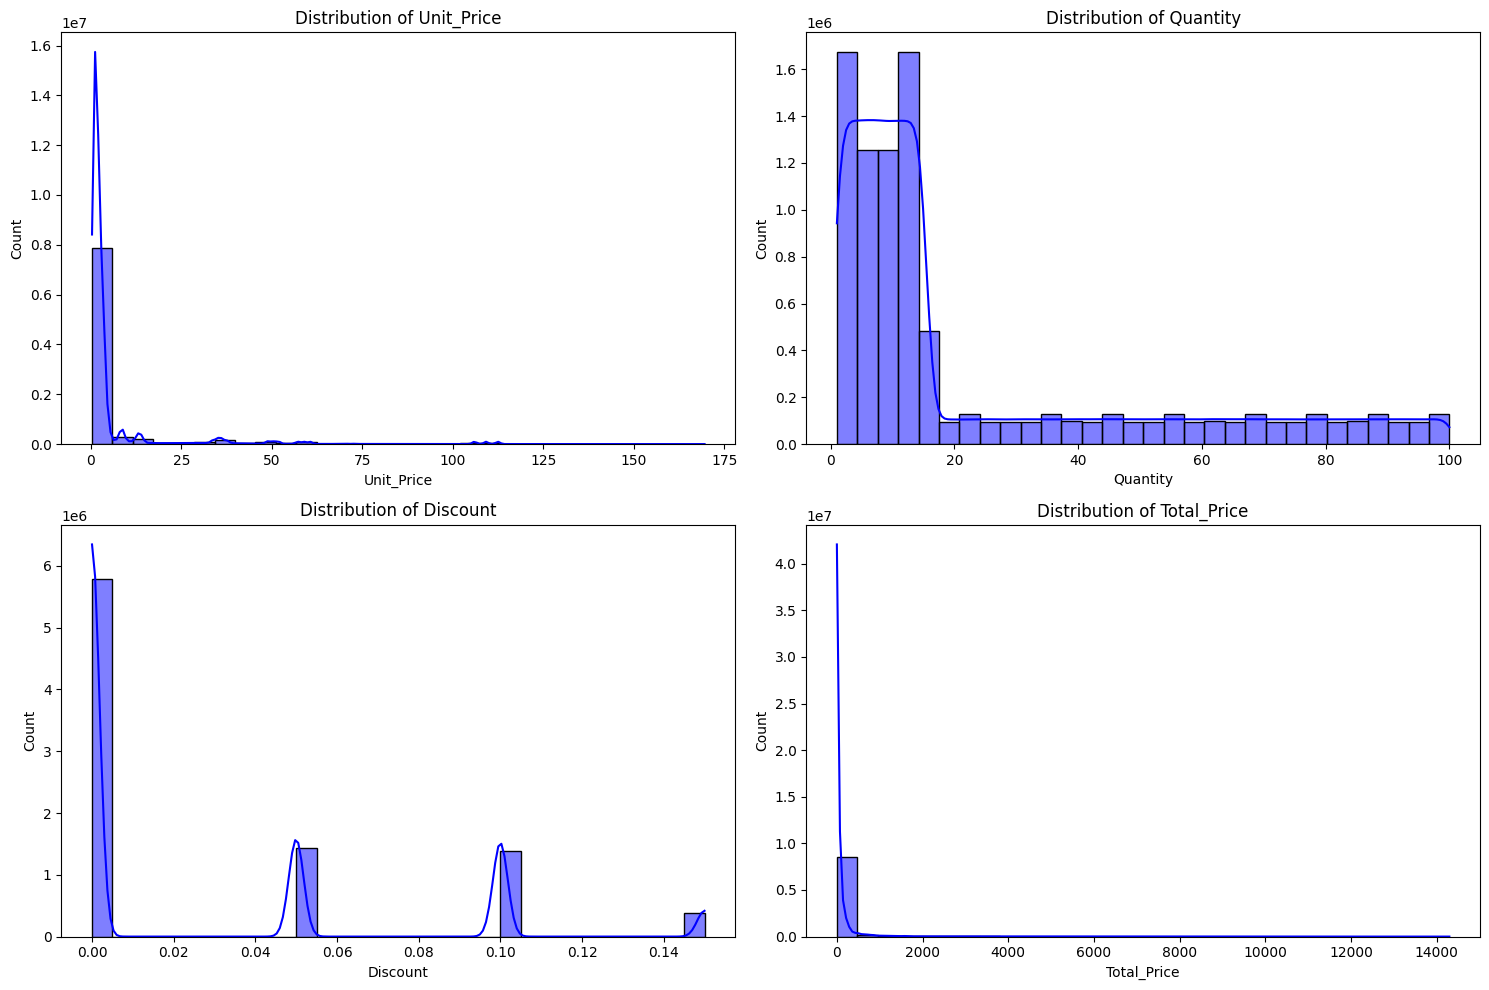

In [10]:
columns_to_plot = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

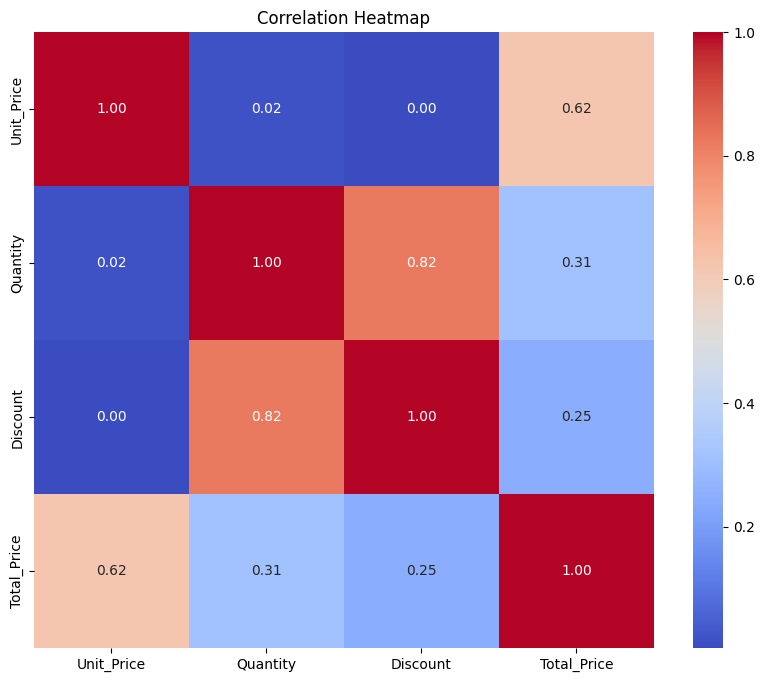

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[columns_to_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

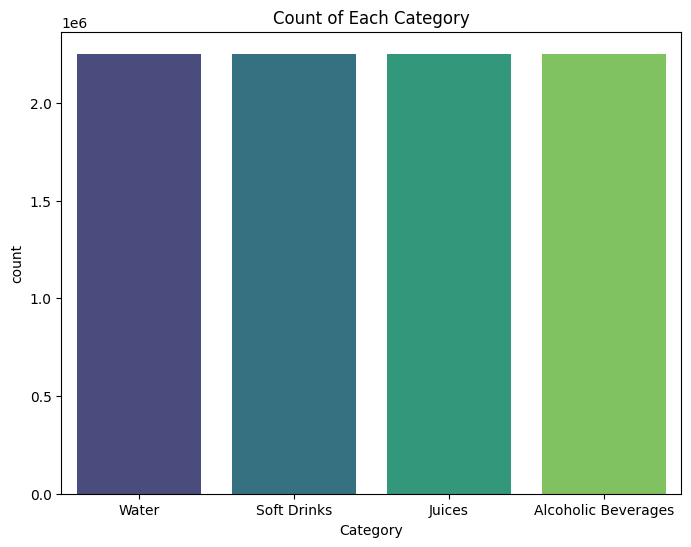

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Category", data=data, hue="Category", palette="viridis")
plt.title("Count of Each Category")
plt.show()

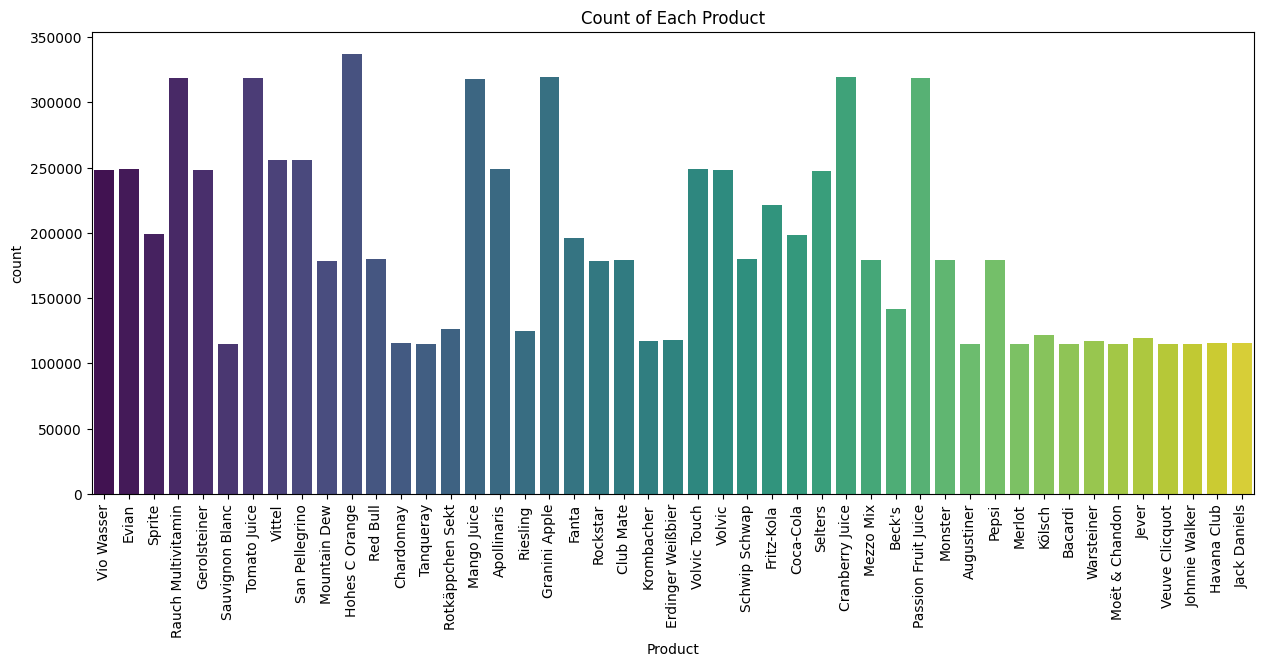

In [21]:
plt.figure(figsize=(15, 6))
sns.countplot(x="Product", data=data, hue="Product", palette="viridis")
plt.title("Count of Each Product")
plt.xticks(rotation=90)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [39]:
last_date = data["Order_Date"].max()

df = df = data.groupby(by="Customer_ID").agg({
    "Order_Date": lambda x: (last_date - x.max()).days,
    "Order_ID": "nunique",
    "Total_Price": "sum"
})

df.columns = ["Recency", "Frequency", "Monetary"]
df.head()

,Recency,Frequency,Monetary
Customer_ID,,,
CUS1,1,305,38904.13
CUS10,2,296,40288.83
CUS100,3,287,36039.74
CUS1000,1,289,271186.90
CUS10000,7,299,253436.72


In [40]:
mount_discount = (data["Quantity"] * data["Unit_Price"]) * data["Discount"]

df["Count_Discount"] = mount_discount.groupby(data["Customer_ID"]).apply(lambda x: (x > 0).sum())

total_discount = mount_discount.groupby(data["Customer_ID"]).sum()
df["Avg_Discount"] = total_discount / df["Frequency"]

df["AOV"] = df["Monetary"] / df["Frequency"]

df["Top_Category"] = data.groupby(data["Customer_ID"])["Category"].agg(lambda x: x.mode()[0])

df.head()

,Recency,Frequency,Monetary,Count_Discount,Avg_Discount,AOV,Top_Category
Customer_ID,,,,,,,
CUS1,1,305,38904.13,0,0.000000,127.554525,Soft Drinks
CUS10,2,296,40288.83,0,0.000000,136.110912,Water
CUS100,3,287,36039.74,0,0.000000,125.574007,Soft Drinks
CUS1000,1,289,271186.90,881,99.625474,938.362976,Soft Drinks
CUS10000,7,299,253436.72,929,92.616119,847.614448,Juices


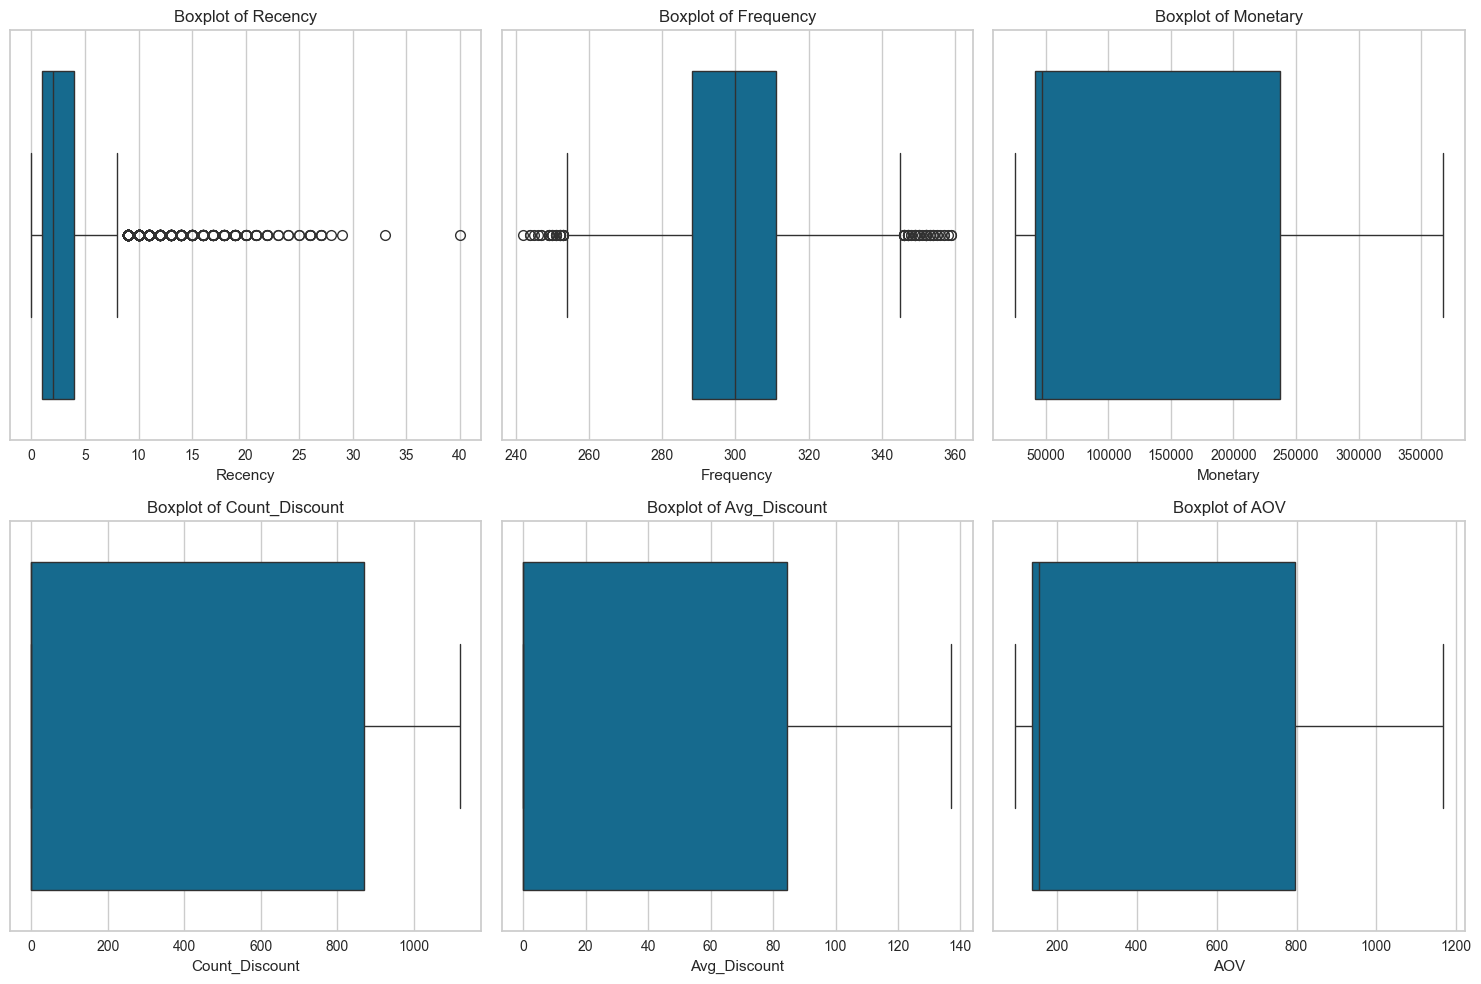

In [41]:
num_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [42]:
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

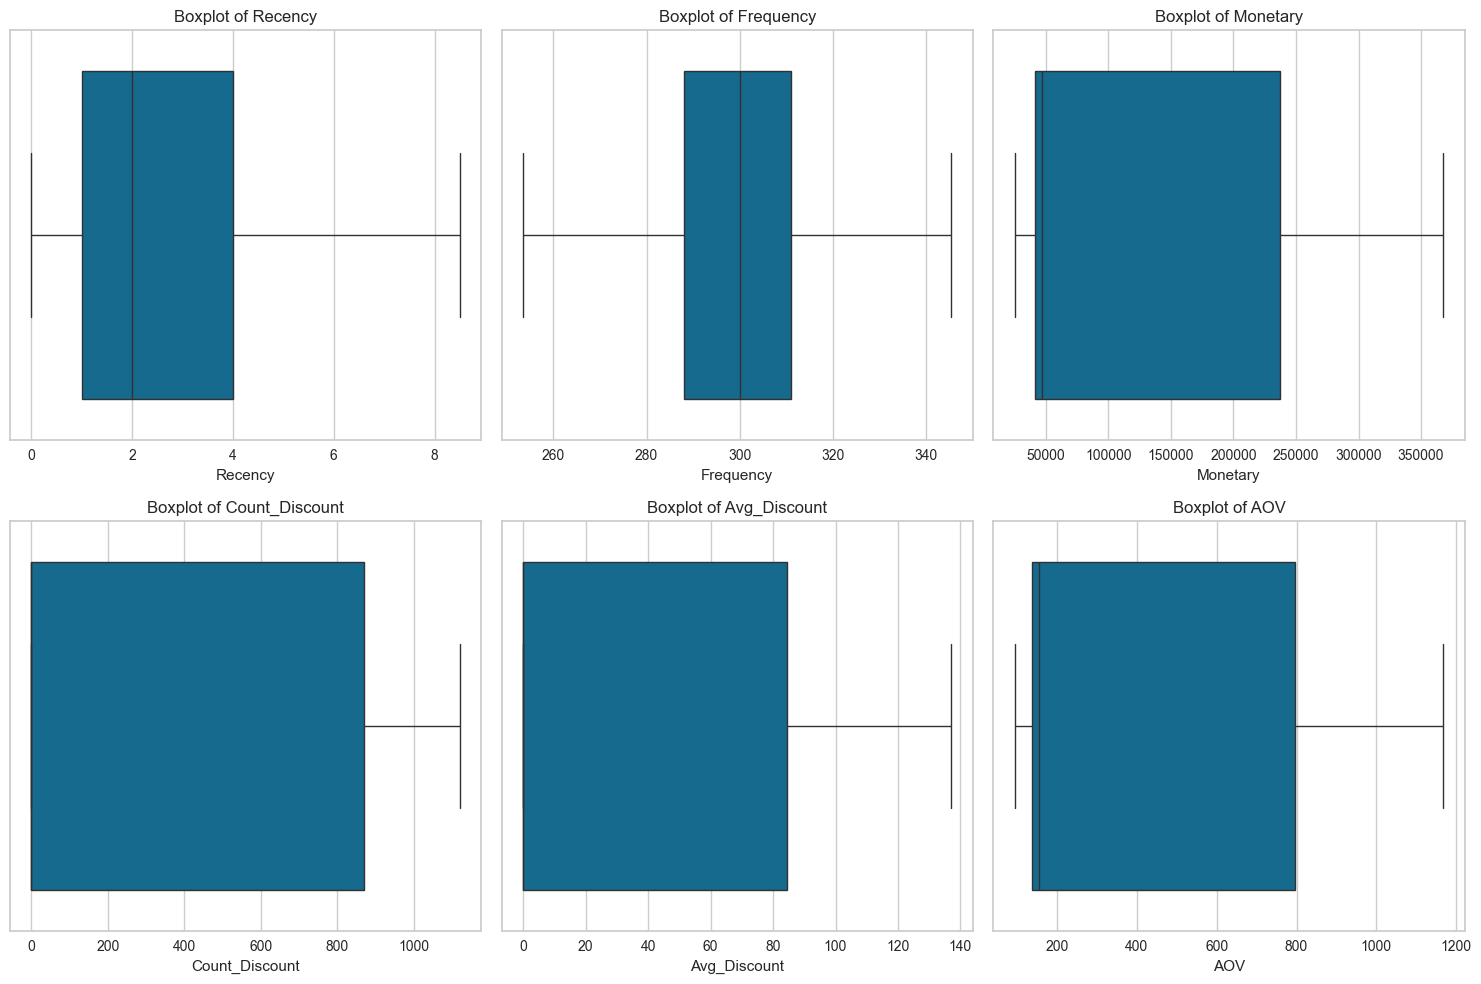

In [43]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

In [44]:
df = pd.get_dummies(df, columns=["Top_Category"])
df.head()

,Recency,Frequency,Monetary,Count_Discount,Avg_Discount,AOV,Top_Category_Alcoholic Beverages,Top_Category_Juices,Top_Category_Soft Drinks,Top_Category_Water
Customer_ID,,,,,,,,,,
CUS1,1.0,305.0,38904.13,0,0.000000,127.554525,False,False,True,False
CUS10,2.0,296.0,40288.83,0,0.000000,136.110912,False,False,False,True
CUS100,3.0,287.0,36039.74,0,0.000000,125.574007,False,False,True,False
CUS1000,1.0,289.0,271186.90,881,99.625474,938.362976,False,False,True,False
CUS10000,7.0,299.0,253436.72,929,92.616119,847.614448,False,True,False,False


In [45]:
scaler = MinMaxScaler()

scaler_features = df.columns
df[scaler_features] = scaler.fit_transform(df[scaler_features])
df.head()

,Recency,Frequency,Monetary,Count_Discount,Avg_Discount,AOV,Top_Category_Alcoholic Beverages,Top_Category_Juices,Top_Category_Soft Drinks,Top_Category_Water
Customer_ID,,,,,,,,,,
CUS1,0.117647,0.559783,0.040211,0.000000,0.000000,0.031146,0.0,0.0,1.0,0.0
CUS10,0.235294,0.461957,0.044253,0.000000,0.000000,0.039118,0.0,0.0,0.0,1.0
CUS100,0.352941,0.364130,0.031851,0.000000,0.000000,0.029301,0.0,0.0,1.0,0.0
CUS1000,0.117647,0.385870,0.718183,0.786607,0.726517,0.786575,0.0,0.0,1.0,0.0
CUS10000,0.823529,0.494565,0.666375,0.829464,0.675402,0.702025,0.0,1.0,0.0,0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [46]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=42)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [47]:
sil_score = silhouette_score(df, kmeans.labels_)
print("Silhouette Score: ", sil_score)

Silhouette Score:  0.4017349299718729


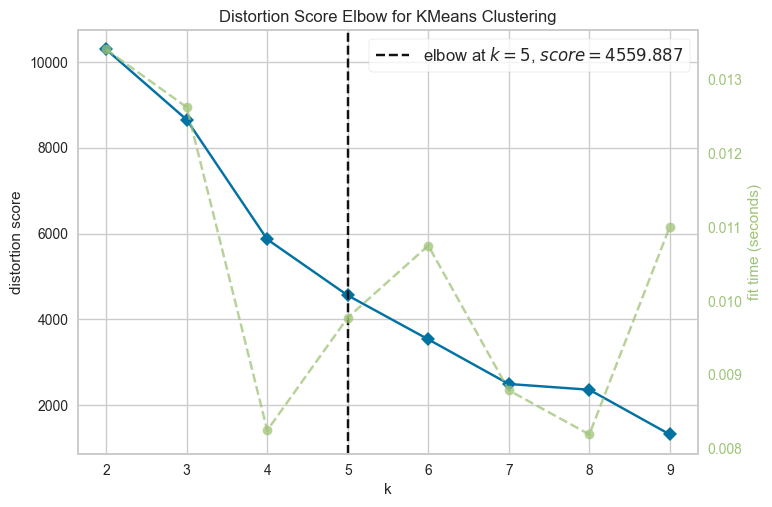

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
kmeans_elbow_method = KMeans(random_state=42)

visualizer = KElbowVisualizer(kmeans_elbow_method, k=(2, 10))
visualizer.fit(df)

visualizer.show()

In [49]:
kmeans_elbow_method = KMeans(n_clusters=5, random_state=42)
kmeans_elbow_method.fit(df)

sil_score = silhouette_score(df, kmeans_elbow_method.labels_)
print("Silhouette Score (Elbow Method): ", sil_score)

Silhouette Score (Elbow Method):  0.47070291112326124


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
pca = PCA(n_components=2, random_state=42)

x_pca = pca.fit_transform(df)    
x_pca = pd.DataFrame(x_pca, columns=["PCA 1", "PCA 2"])

x_pca.head()

,PCA 1,PCA 2
0,-0.513816,-0.277723
1,-0.498322,-0.282853
2,-0.518997,-0.276668
3,0.955571,-0.348254
4,0.882984,-0.337124


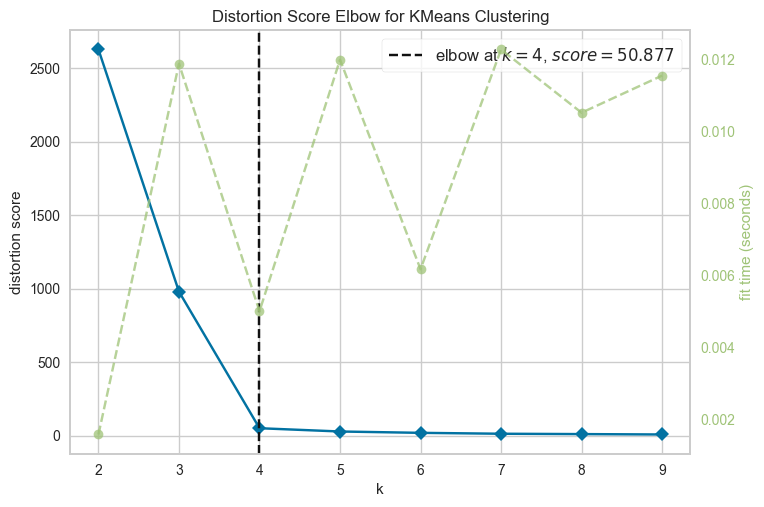

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
kmeans_selection = KMeans(random_state=42)

visualizer = KElbowVisualizer(kmeans_selection, k=(2, 10))
visualizer.fit(x_pca)

visualizer.show()

In [52]:
kmeans_selection = KMeans(n_clusters=4, random_state=42)
kmeans_selection.fit(x_pca)

sil_score = silhouette_score(x_pca, kmeans_selection.labels_)
print(f"Silhoutete Score (PCA): {sil_score}")

Silhoutete Score (PCA): 0.9488127566720838


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

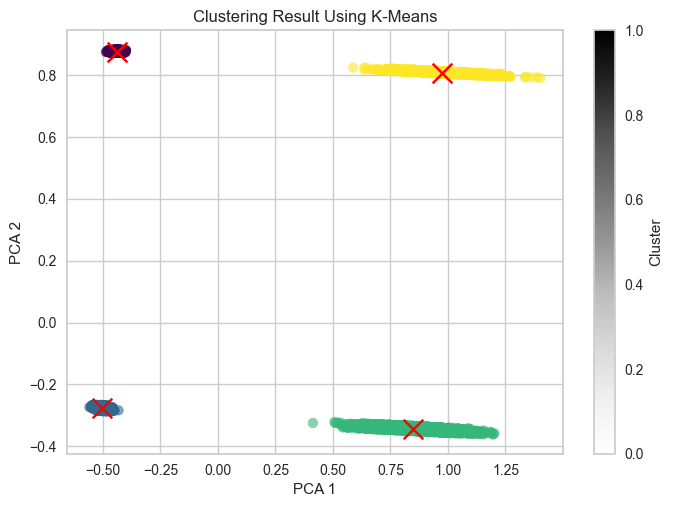

In [53]:
pca_values = x_pca.values

plt.scatter(pca_values[:, 0], pca_values[:, 1], c=kmeans_selection.labels_, cmap="viridis", alpha=0.6)
plt.scatter(kmeans_selection.cluster_centers_[:, 0], kmeans_selection.cluster_centers_[:, 1],
            c="red", marker="x", s=200, label="Centroids")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clustering Result Using K-Means")
plt.colorbar(label="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [54]:
df["Cluster"] = kmeans_selection.labels_

df.head()

,Recency,Frequency,Monetary,Count_Discount,Avg_Discount,AOV,Top_Category_Alcoholic Beverages,Top_Category_Juices,Top_Category_Soft Drinks,Top_Category_Water,Cluster
Customer_ID,,,,,,,,,,,
CUS1,0.117647,0.559783,0.040211,0.000000,0.000000,0.031146,0.0,0.0,1.0,0.0,1
CUS10,0.235294,0.461957,0.044253,0.000000,0.000000,0.039118,0.0,0.0,0.0,1.0,1
CUS100,0.352941,0.364130,0.031851,0.000000,0.000000,0.029301,0.0,0.0,1.0,0.0,1
CUS1000,0.117647,0.385870,0.718183,0.786607,0.726517,0.786575,0.0,0.0,1.0,0.0,2
CUS10000,0.823529,0.494565,0.666375,0.829464,0.675402,0.702025,0.0,1.0,0.0,0.0,2


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [55]:
df[scaler_features] = scaler.inverse_transform(df[scaler_features])

category_cols = ["Top_Category_Alcoholic Beverages", "Top_Category_Juices", "Top_Category_Soft Drinks", "Top_Category_Water"]

df["Top_Category"] = df[category_cols].idxmax(axis=1).str.replace("Top_Category_", "")
df = df.drop(columns=category_cols)

df.head()

,Recency,Frequency,Monetary,Count_Discount,Avg_Discount,AOV,Cluster,Top_Category
Customer_ID,,,,,,,,
CUS1,1.0,305.0,38904.13,0.0,0.000000,127.554525,1,Soft Drinks
CUS10,2.0,296.0,40288.83,0.0,0.000000,136.110912,1,Water
CUS100,3.0,287.0,36039.74,0.0,0.000000,125.574007,1,Soft Drinks
CUS1000,1.0,289.0,271186.90,881.0,99.625474,938.362976,2,Soft Drinks
CUS10000,7.0,299.0,253436.72,929.0,92.616119,847.614448,2,Juices


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [57]:
labels = kmeans_selection.labels_
k = 4

def analyze_clusters(X, labels, k):
    print("Characteristics of Clusters:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_recency = cluster_data["Recency"].mean()
        mean_frequency = cluster_data["Frequency"].mean()  
        mean_monetary = cluster_data["Monetary"].mean()
        mean_discount = cluster_data["Avg_Discount"].mean()
        mean_count_discount = cluster_data["Count_Discount"].mean()
        aov = cluster_data["AOV"].mean()
        top_category = cluster_data["Top_Category"].mode()[0]

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Mean Recency: {mean_recency:.2f} days")
        print(f"Mean Frequency: {mean_frequency:.2f}")
        print(f"Mean Monetary: ${mean_monetary:.2f}")
        print(f"Mean Discount: ${mean_discount:.2f}")
        print(f"Mean Count Discount: {mean_count_discount:.2f} Product")
        print(f"Average Order Value: ${aov:.2f}")
        print(f"Top Category: {top_category}")

analyze_clusters(df, labels, k)

Characteristics of Clusters:

Cluster 1:
Mean Recency: 2.83 days
Mean Frequency: 300.49
Mean Monetary: $44881.74
Mean Discount: $0.00
Mean Count Discount: 0.00 Product
Average Order Value: $149.33
Top Category: Alcoholic Beverages

Cluster 2:
Mean Recency: 2.82 days
Mean Frequency: 299.83
Mean Monetary: $41979.81
Mean Discount: $0.00
Mean Count Discount: 0.00 Product
Average Order Value: $140.01
Top Category: Juices

Cluster 3:
Mean Recency: 2.85 days
Mean Frequency: 299.93
Mean Monetary: $248460.94
Mean Discount: $88.56
Mean Count Discount: 899.27 Product
Average Order Value: $828.51
Top Category: Water

Cluster 4:
Mean Recency: 2.95 days
Mean Frequency: 300.05
Mean Monetary: $265821.11
Mean Discount: $94.80
Mean Count Discount: 899.69 Product
Average Order Value: $885.91
Top Category: Alcoholic Beverages


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Recency:** 2.83 Hari  
- **Rata-rata Frequency Pembelian:** 300.49 Transaksi  
- **Rata-rata Monetary:** $44,881.74  
- **Rata-rata Jumlah Discount:** $0.00  
- **Rata-rata Jumlah Produk yang dibeli menggunakan Discount:** 0.00 Produk  
- **Rata-rata Nilai Pesanan (Average Order Value):** $149.33  
- **Kategori produk yang paling sering dibeli:** Alcoholic Beverages  
- **Analisis:** Pelanggan dalam cluster ini sangat aktif, dengan frekuensi pembelian tinggi namun nilai transaksi per pesanan yang relatif menengah. Tidak terdapat penggunaan diskon, menunjukkan bahwa pelanggan ini cenderung loyal tanpa ketergantungan pada promosi. Preferensi utama mereka adalah Alcoholic Beverages.

## Cluster 2:
- **Rata-rata Recency:** 2.82 Hari  
- **Rata-rata Frequency Pembelian:** 299.83 Transaksi  
- **Rata-rata Monetary:** $41,979.81  
- **Rata-rata Jumlah Discount:** $0.00  
- **Rata-rata Jumlah Produk yang dibeli menggunakan Discount:** 0.00 Produk  
- **Rata-rata Nilai Pesanan (Average Order Value):** $140.01  
- **Kategori produk yang paling sering dibeli:** Juices  
- **Analisis:** Kelompok pelanggan ini juga aktif berbelanja dengan nilai transaksi total yang cukup mirip dengan Cluster 1. Tidak ada penggunaan diskon, dan nilai rata-rata per transaksi sedikit lebih rendah. Minat utama mereka adalah pada produk Juices, yang menunjukkan segmen pasar yang mungkin lebih health-conscious atau spesifik pada kebutuhan minuman sehat.

## Cluster 3:
- **Rata-rata Recency:** 2.85 Hari  
- **Rata-rata Frequency Pembelian:** 299.93 Transaksi  
- **Rata-rata Monetary:** $248,460.94  
- **Rata-rata Jumlah Discount:** $88.56  
- **Rata-rata Jumlah Produk yang dibeli menggunakan Discount:** 899.27 Produk  
- **Rata-rata Nilai Pesanan (Average Order Value):** $828.51  
- **Kategori produk yang paling sering dibeli:** Water  
- **Analisis:** Ini adalah kelompok pelanggan dengan nilai transaksi yang sangat tinggi. Mereka memanfaatkan diskon dalam pembelian mereka, terlihat dari nilai diskon dan jumlah produk yang menggunakan diskon. Fokus pembelian pada Water menunjukkan kebutuhan volume besar, kemungkinan untuk keperluan bisnis, event, atau konsumsi massal.

## Cluster 4:
- **Rata-rata Recency:** 2.95 Hari  
- **Rata-rata Frequency Pembelian:** 300.05 Transaksi  
- **Rata-rata Monetary:** $265,821.11  
- **Rata-rata Jumlah Discount:** $94.80  
- **Rata-rata Jumlah Produk yang dibeli menggunakan Discount:** 899.69 Produk  
- **Rata-rata Nilai Pesanan (Average Order Value):** $885.91  
- **Kategori produk yang paling sering dibeli:** Alcoholic Beverages  
- **Analisis:** Cluster ini merupakan pelanggan dengan nilai transaksi tertinggi. Mereka cukup responsif terhadap promosi diskon, dan melakukan pembelian dengan nilai order yang sangat besar. Fokus utama mereka tetap pada produk Alcoholic Beverages, menunjukkan peluang besar untuk mempertahankan pelanggan ini melalui program loyalitas eksklusif dan promosi premium.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [58]:
df.to_csv("Dataset_clustering.csv")